## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
# Import country relationship data

relationship_df = pd.read_csv('keyevents_20thcentury_countries_relationship.csv', index_col = 0)

In [3]:
relationship_df

,source,target,value
0,France,Italy,11
1,Italy,Russia,2
2,Germany,Russia,10
3,Austria,Germany,2
4,Austria,Hungary,2
...,...,...,...
75,Denmark,France,5
76,Italy,Japan,14
77,India,Iran,5
78,Afghanistan,India,5


In [4]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

## Create Network Visualization

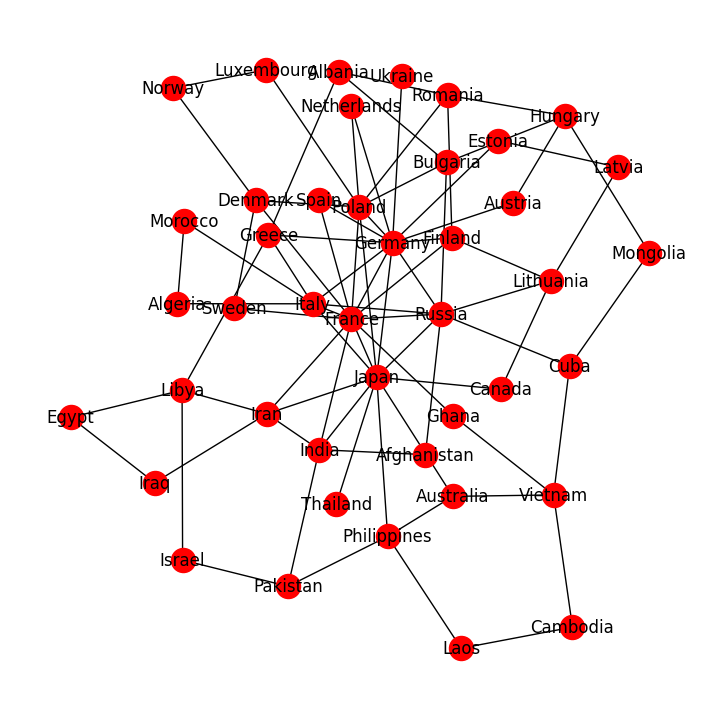

In [5]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

- From above chart we can see that all of the countries are connected to each other. France and Germany looks to have more connection than other countries. Japan is another promoinent country with most of the connections

In [6]:
h.savefig('networkx_plt_20th_Century.png')

## Graph visualization - Pyvis

In [7]:
# Define net object

net = Network(cdn_resources='remote')
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century.html")

20th_century.html


- From above chart, it confirms further that Germany, France and Japan are the main actors as the connection from them have thicker lines. Poland looks like has much of its connection with Germany and they are mentioned together frequently in the text. Russia, and Italy are also prominent countries but looks like less powerful than Germany, France and Japan

## Community detection - Leiden algorithm

In [8]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'bayanpy', 'graph_tool', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [9]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [10]:
new_com = coms.to_node_community_map()

In [11]:
new_com

defaultdict(list,
            {'France': [0],
             'Germany': [0],
             'Ukraine': [0],
             'Spain': [0],
             'Poland': [0],
             'Finland': [0],
             'Luxembourg': [0],
             'Norway': [0],
             'Denmark': [0],
             'Sweden': [0],
             'Netherlands': [0],
             'Japan': [1],
             'Thailand': [1],
             'Philippines': [1],
             'Australia': [1],
             'Laos': [1],
             'Cambodia': [1],
             'Vietnam': [1],
             'Ghana': [1],
             'Russia': [2],
             'Austria': [2],
             'Hungary': [2],
             'Bulgaria': [2],
             'Albania': [2],
             'Romania': [2],
             'Mongolia': [2],
             'Cuba': [2],
             'Libya': [3],
             'Egypt': [3],
             'Iraq': [3],
             'Iran': [3],
             'India': [3],
             'Pakistan': [3],
             'Israel': [3],
        

In [12]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [13]:
dict_com 

{'France': 0,
 'Germany': 0,
 'Ukraine': 0,
 'Spain': 0,
 'Poland': 0,
 'Finland': 0,
 'Luxembourg': 0,
 'Norway': 0,
 'Denmark': 0,
 'Sweden': 0,
 'Netherlands': 0,
 'Japan': 1,
 'Thailand': 1,
 'Philippines': 1,
 'Australia': 1,
 'Laos': 1,
 'Cambodia': 1,
 'Vietnam': 1,
 'Ghana': 1,
 'Russia': 2,
 'Austria': 2,
 'Hungary': 2,
 'Bulgaria': 2,
 'Albania': 2,
 'Romania': 2,
 'Mongolia': 2,
 'Cuba': 2,
 'Libya': 3,
 'Egypt': 3,
 'Iraq': 3,
 'Iran': 3,
 'India': 3,
 'Pakistan': 3,
 'Israel': 3,
 'Afghanistan': 3,
 'Estonia': 4,
 'Latvia': 4,
 'Lithuania': 4,
 'Canada': 4,
 'Italy': 5,
 'Greece': 5,
 'Morocco': 5,
 'Algeria': 5}

In [14]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_century_communities_leiden.html")

20th_century_communities_leiden.html


- From laiden algorithm chart above, we can see clustering of the countries . Looks like there is a separate clustering of the European and Asian Countries. Germany and Japan work as anchor in connecting between Asia and Europe. Russia looks like has played important role in bridging the countries like Afghanistan, and also less prominent conuntries like Cuba, Hungary, etc. 

From above, I think it makes sense as the 20th centruy century was marked with different events like World War, Russian Evolution, great depression, etc. and these countries played pivotal roles in those events.

## The most important Countries in 20th Century data

In [15]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.2857142857142857,
 'Italy': 0.16666666666666666,
 'Russia': 0.19047619047619047,
 'Germany': 0.2857142857142857,
 'Austria': 0.047619047619047616,
 'Hungary': 0.09523809523809523,
 'Bulgaria': 0.09523809523809523,
 'Ukraine': 0.023809523809523808,
 'Spain': 0.047619047619047616,
 'Poland': 0.19047619047619047,
 'Estonia': 0.047619047619047616,
 'Latvia': 0.047619047619047616,
 'Lithuania': 0.09523809523809523,
 'Finland': 0.09523809523809523,
 'Luxembourg': 0.047619047619047616,
 'Norway': 0.047619047619047616,
 'Denmark': 0.09523809523809523,
 'Sweden': 0.047619047619047616,
 'Greece': 0.09523809523809523,
 'Albania': 0.07142857142857142,
 'Libya': 0.09523809523809523,
 'Egypt': 0.047619047619047616,
 'Iraq': 0.047619047619047616,
 'Iran': 0.11904761904761904,
 'Japan': 0.26190476190476186,
 'Morocco': 0.047619047619047616,
 'Algeria': 0.047619047619047616,
 'Netherlands': 0.047619047619047616,
 'Thailand': 0.023809523809523808,
 'Philippines': 0.09523809523809523,
 'Aust

In [16]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [17]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

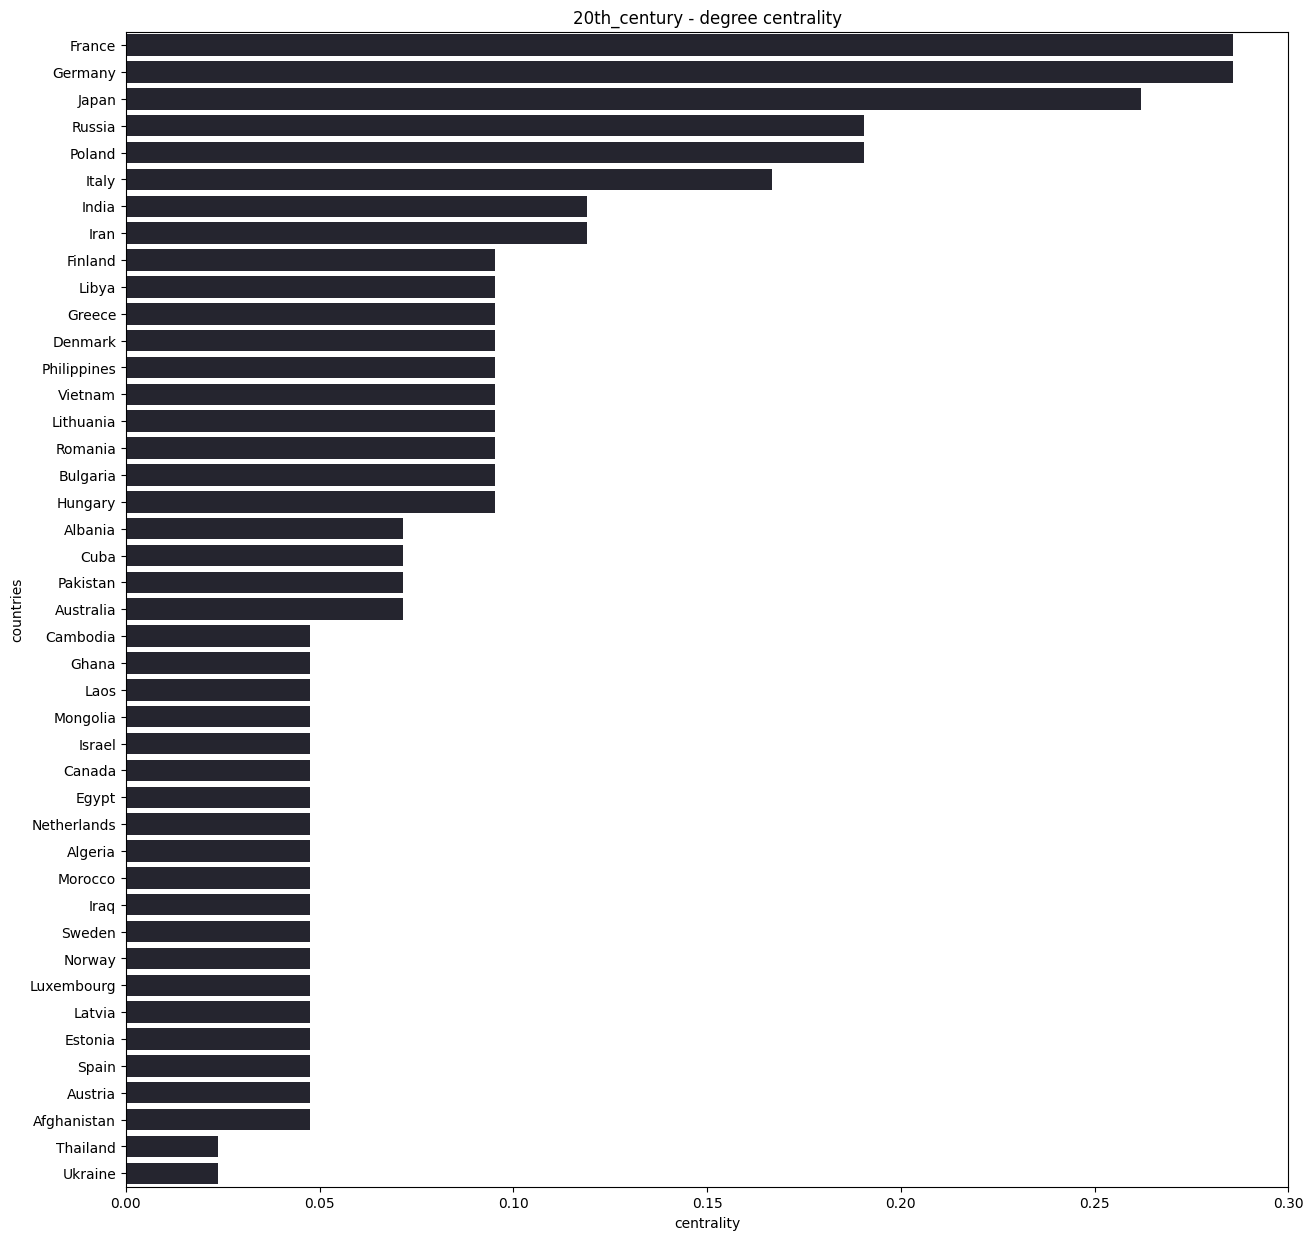

In [18]:
# Plot the degree centrality

plt.figure(figsize = (15, 15))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th_century - degree centrality")

- Based on the degree centrality, France, Germany, and Japan have the highest importance scores, indicating they are the most well-connected and potentially the most influential or central nodes in the network. They have more direct connections compared to other countries, making them key players.

In [19]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [20]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

In [21]:
closeness_df

,countries,centrality
0,France,0.525000
24,Japan,0.518519
3,Germany,0.512195
2,Russia,0.477273
1,Italy,0.461538
9,Poland,0.446809
23,Iran,0.411765
13,Finland,0.407767
31,India,0.400000
18,Greece,0.392523


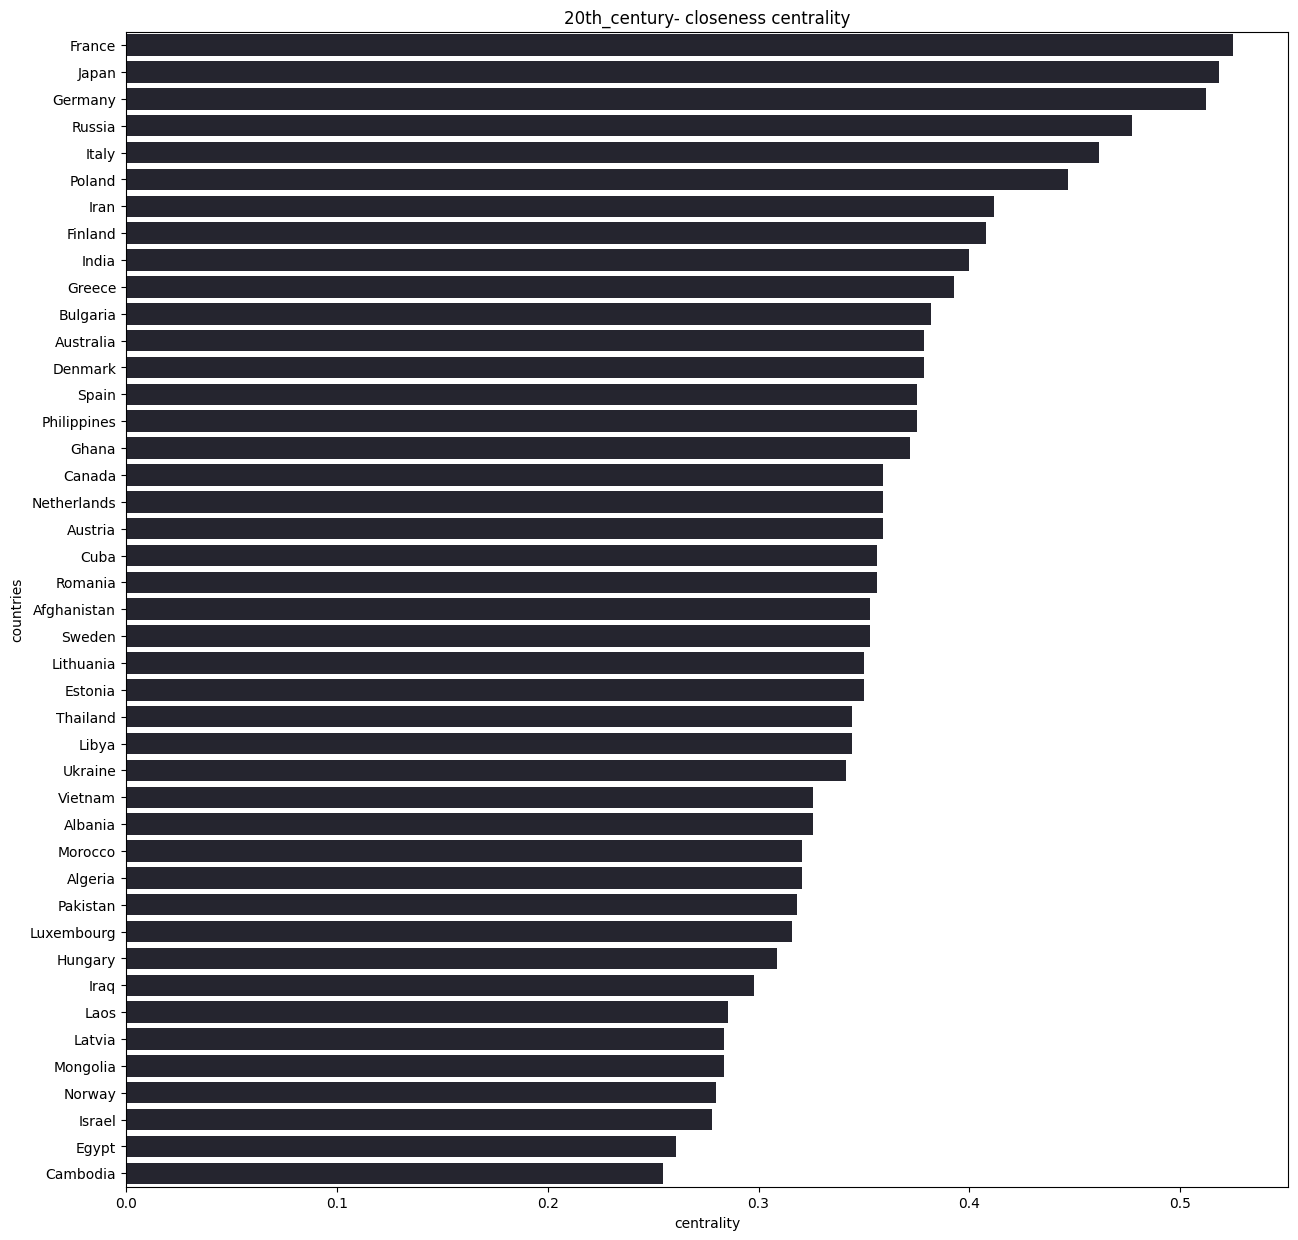

In [22]:
plt.figure(figsize = (15,15))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th_century- closeness centrality")

- From above we can see that France, Japan, and Germany have higher importance score for closeness. Since closeness centrality indicates shortest distances between the nodes, we can interpret that they can quickly interact with or reach other countries, making them highly influential.



In [23]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [24]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

In [25]:
betweennes_df

,countries,centrality
24,Japan,0.262353
0,France,0.237371
3,Germany,0.230593
2,Russia,0.155984
9,Poland,0.126627
1,Italy,0.106834
23,Iran,0.094778
18,Greece,0.072661
20,Libya,0.069482
29,Philippines,0.067106


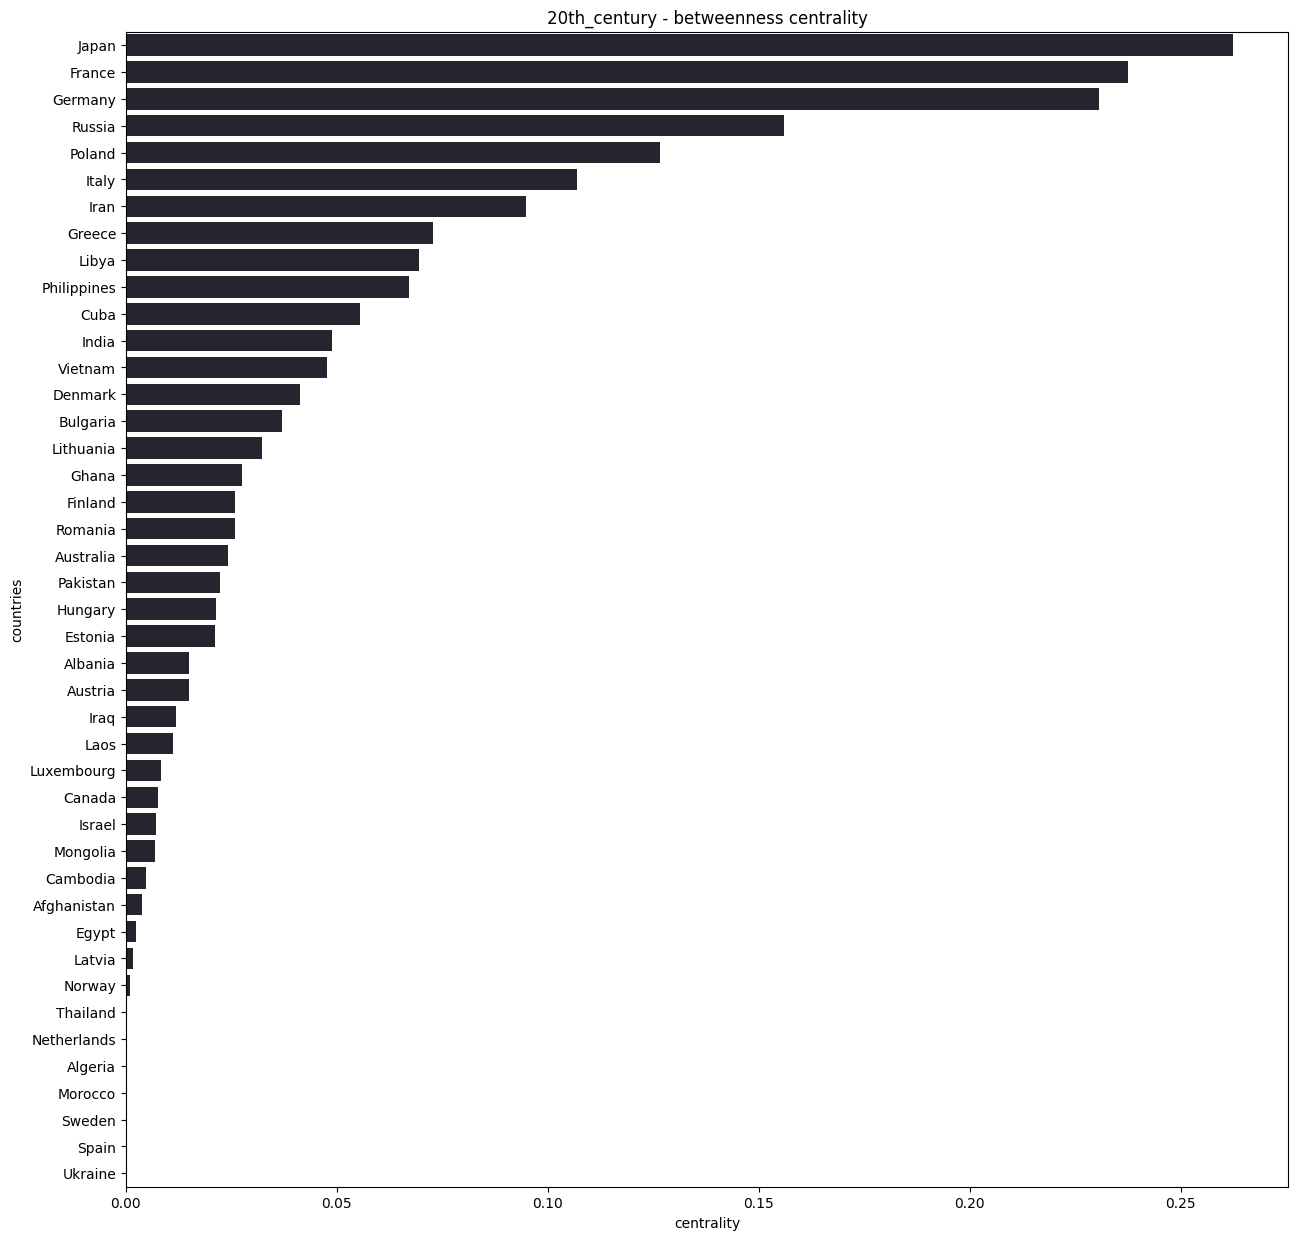

In [26]:
plt.figure(figsize = (15,15))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th_century - betweenness centrality")

Betweenness centrality is important to understand the bridge between different nodes. From above we can see that Japan has the highest importance score for betweenness centrality followed by France and Germany indcating they act as the key nodes/intermediaries in the overall network. 

In [27]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality_20th_century')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality_20th_century')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality_20th_century')

## Conclusion

- France, Germany, and Japan have highest score in all categories indicating that they played key role in the network. Since the data was from the 20th century world politics, it indicates that these three countries were major powerhorse and played significant role during that time.